In [0]:
!pip install -q keras


In [4]:
!pip install git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-w5572bks
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-w5572bks
  Created wheel for efficientnet: filename=efficientnet-1.1.0-cp36-none-any.whl size=18327 sha256=5818152b655309a0a55f2967ec57d051ec6079bd050ede3c381c7e9a874efaa3
  Stored in directory: /tmp/pip-ephem-wheel-cache-8x_14l3e/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet


In [3]:
!pip install keras_efficientnets

In [2]:
#Libraries Needed
import keras
import tensorflow as tf
from keras_efficientnets import EfficientNetB0,optimize
from keras.applications import vgg16
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model,load_model
from keras.utils import plot_model
from glob import glob
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


ModuleNotFoundError: ignored

In [8]:
#dataset link
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model=EfficientNetB0(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in model.layers:
  layer.trainable=False
x=Flatten()(model.output)
folder=glob('/content/drive/My Drive/Clean-Dataset-Revised/train/*')
prediction=Dense(len(folder),activation='softmax')(x)

In [0]:
_model_=Model(inputs=model.input,outputs=prediction)
#_model_.summary()

In [0]:
_model_.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
    metrics=['accuracy']
)

In [0]:
%cd "/content/drive/My Drive/"
%cp -av "Clean-Dataset-Revised" "/content/sample_data"

/content/drive/My Drive
'Clean-Dataset-Revised' -> '/content/sample_data/Clean-Dataset-Revised'
'Clean-Dataset-Revised/train' -> '/content/sample_data/Clean-Dataset-Revised/train'
'Clean-Dataset-Revised/train/others' -> '/content/sample_data/Clean-Dataset-Revised/train/others'
'Clean-Dataset-Revised/train/others/B0078_0349.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0349.png'
'Clean-Dataset-Revised/train/others/B0078_0350.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0350.png'
'Clean-Dataset-Revised/train/others/B0078_0351.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0351.png'
'Clean-Dataset-Revised/train/others/B0078_0352.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0352.png'
'Clean-Dataset-Revised/train/others/B0078_0353.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0353.png'
'Clean-Dataset-Revised/train/others/B0078_0354.png' -> '/content/sample_data/Clean

In [1]:
Train_data_dir="/content/sample_data/Clean-Dataset-Revised/train"
Test_data_dir="/content/sample_data/Clean-Dataset-Revised/test"
datagen_train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, fill_mode='nearest',rotation_range=40, width_shift_range=0.2,
        height_shift_range=0.2)
datagen_test=ImageDataGenerator(rescale=1./255)
training_set=datagen_train.flow_from_directory(Train_data_dir,batch_size=32,class_mode='categorical',target_size=(224,224))
validation_set=datagen_test.flow_from_directory(Test_data_dir,batch_size=32,class_mode='categorical',target_size=(224,224))

NameError: ignored

In [0]:
r=_model_.fit_generator(training_set,validation_data=validation_set,epochs=25,steps_per_epoch=len(training_set),validation_steps=len(validation_set))



Epoch 1/25
49/49 [==============================] - 30s 604ms/step - loss: 0.2816 - accuracy: 0.9781 - val_loss: 2.5391 - val_accuracy: 0.6475
Epoch 2/25
49/49 [==============================] - 24s 493ms/step - loss: 0.2147 - accuracy: 0.9806 - val_loss: 5.5635 - val_accuracy: 0.6475
Epoch 3/25
49/49 [==============================] - 25s 515ms/step - loss: 0.2517 - accuracy: 0.9794 - val_loss: 8.1052 - val_accuracy: 0.6400
Epoch 4/25
49/49 [==============================] - 25s 519ms/step - loss: 0.2152 - accuracy: 0.9852 - val_loss: 3.2934 - val_accuracy: 0.6450
Epoch 5/25
49/49 [==============================] - 25s 517ms/step - loss: 0.2283 - accuracy: 0.9787 - val_loss: 10.9661 - val_accuracy: 0.6400
Epoch 6/25
49/49 [==============================] - 25s 516ms/step - loss: 0.2168 - accuracy: 0.9781 - val_loss: 3.5920 - val_accuracy: 0.6425
Epoch 7/25
49/49 [==============================] - 25s 519ms/step - loss: 0.1457 - accuracy: 0.9865 - val_loss: 6.0550 - val_accuracy: 0.645

In [0]:
_model_.save('/content/drive/My Drive/Models/EFFICIENTNET_B0_TL_MOD.h5')

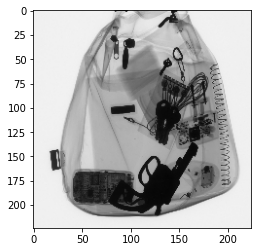

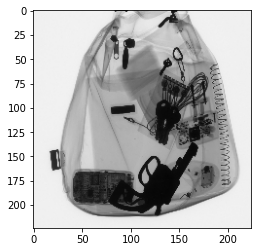

In [0]:
img=load_img('/content/drive/My Drive/Baggages/Baggages/B0046/B0046_0007.png',target_size=(224,224))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
plt.imshow(np.uint8(img_array))
plt.show()

In [7]:
f_model=load_model('/content/drive/My Drive/Models/EFFICIENTNET_B0_TL_MOD.h5')

OSError: ignored

In [0]:
img = cv2.imread('/content/drive/My Drive/Baggages/Baggages/B0046/B0046_0007.png')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

classes =f_model.predict(img)

print(classes)

[[0. 1. 0. 0.]]


In [0]:
f_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
history=r
print(history.history.keys())



dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


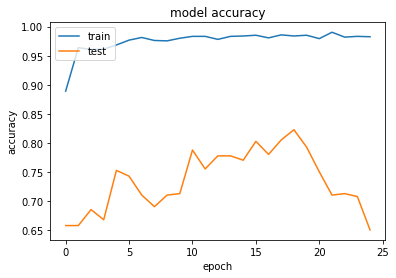

In [0]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

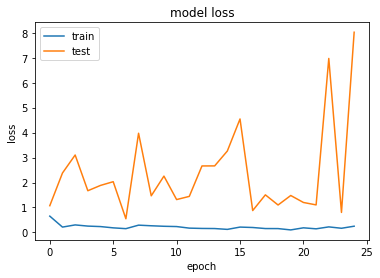

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# New Section